# Import package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Import data raw

In [2]:
cars = pd.read_csv('/Users/dang/Desktop/Learning/DataScience_SupplyChain/Jupyternotebook_source/Section_8/cars.csv')

In [3]:
iris = pd.read_csv('/Users/dang/Desktop/Learning/DataScience_SupplyChain/Jupyternotebook_source/Section_8/iris.csv')

In [7]:
twenty_eleven = pd.read_csv('/Users/dang/Desktop/Learning/DataScience_SupplyChain/Jupyternotebook_source/Section_8/twentyeleven.csv')

# 3.Make a line plot of the sales of 2011 for the united kingdom

In [16]:
twenty_eleven_UK = twenty_eleven.loc[(twenty_eleven['Country'] == 'United Kingdom') & (twenty_eleven['year'] == 2011)]

In [17]:
twenty_eleven_UK.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,revenue,year
0,539993.0,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04T10:00:00Z,1.95,13313.0,United Kingdom,2011-01-04,19.5,2011
1,539993.0,21499,BLUE POLKADOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
2,539993.0,21498,RED RETROSPOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
3,539993.0,22379,RECYCLING BAG RETROSPOT,5,2011-01-04T10:00:00Z,2.10,13313.0,United Kingdom,2011-01-04,10.5,2011
4,539993.0,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04T10:00:00Z,1.25,13313.0,United Kingdom,2011-01-04,12.5,2011


In [23]:
twenty_eleven_UK['date'] = pd.to_datetime(twenty_eleven_UK['date'])

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
twenty_eleven_UK = twenty_eleven_UK.groupby('date').agg(sales=('Quantity', 'sum'))

In [93]:
twenty_eleven_UK.head()

,sales
date,
2011-01-04,8337
2011-01-05,19034
2011-01-06,17929
2011-01-07,13276
2011-01-09,7321


<AxesSubplot:xlabel='date', ylabel='sales'>

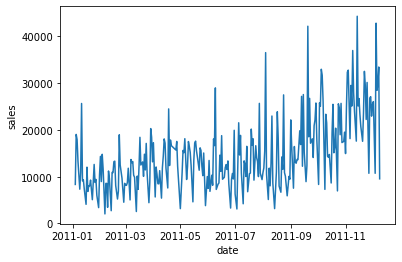

In [94]:
sns.lineplot(x=twenty_eleven_UK.index, y=twenty_eleven_UK['sales'], data=twenty_eleven_UK)

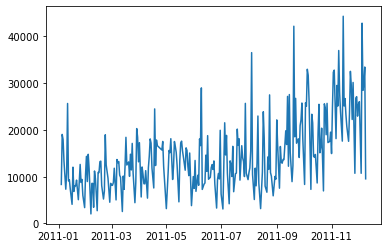

In [96]:
plt.plot(twenty_eleven_UK.index, twenty_eleven_UK['sales'])

# 4.For the next plot select country (Canada, Denmark, EIRE, United Kingdom)

In [100]:
twenty_eleven_split = twenty_eleven.loc[(twenty_eleven['Country'].isin(['Canada', 'Denmark', 'EIRE', 'United Kingdom']))]

In [101]:
twenty_eleven_split.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,revenue,year
0,539993.0,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04T10:00:00Z,1.95,13313.0,United Kingdom,2011-01-04,19.5,2011
1,539993.0,21499,BLUE POLKADOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
2,539993.0,21498,RED RETROSPOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
3,539993.0,22379,RECYCLING BAG RETROSPOT,5,2011-01-04T10:00:00Z,2.10,13313.0,United Kingdom,2011-01-04,10.5,2011
4,539993.0,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04T10:00:00Z,1.25,13313.0,United Kingdom,2011-01-04,12.5,2011


In [102]:
twenty_eleven_split['date'] = pd.to_datetime(twenty_eleven_split['date'])

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
twenty_eleven_split = twenty_eleven_split.groupby(['date', 'Country']).agg(sales=('Quantity', 'sum')).reset_index()

In [105]:
twenty_eleven_split.head()

,date,Country,sales
0,2011-01-04,United Kingdom,8337
1,2011-01-05,United Kingdom,19034
2,2011-01-06,United Kingdom,17929
3,2011-01-07,United Kingdom,13276
4,2011-01-09,EIRE,85


In [106]:
twenty_eleven_pivot = pd.pivot_table(twenty_eleven_split, values='sales', columns='Country', index='date', fill_value=0)

In [107]:
twenty_eleven_pivot

Country,Canada,Denmark,EIRE,United Kingdom
date,,,,
2011-01-04,0,0,0,8337
2011-01-05,0,0,0,19034
2011-01-06,0,0,0,17929
2011-01-07,0,0,0,13276
2011-01-09,0,0,85,7321
...,...,...,...,...
2011-12-05,0,173,219,42817
2011-12-06,0,0,0,28464
2011-12-07,0,0,1998,29821


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

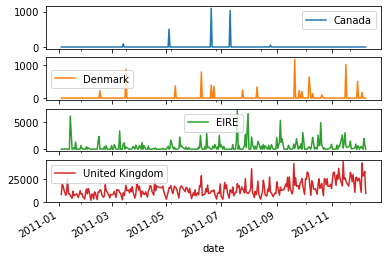

In [109]:
twenty_eleven_pivot.plot(subplots=True)

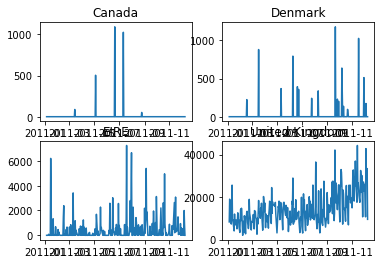

In [112]:
plt.subplot(2,2,1)
plt.plot(twenty_eleven_pivot['Canada'])
plt.title('Canada')

plt.subplot(2,2,2)
plt.plot(twenty_eleven_pivot['Denmark'])
plt.title('Denmark')

plt.subplot(2,2,3)
plt.plot(twenty_eleven_pivot['EIRE'])
plt.title('EIRE')

plt.subplot(2,2,4)
plt.plot(twenty_eleven_pivot['United Kingdom'])
plt.title('United Kingdom')

plt.show()

# 5.Make a scatter plot for cá between price and horsepower

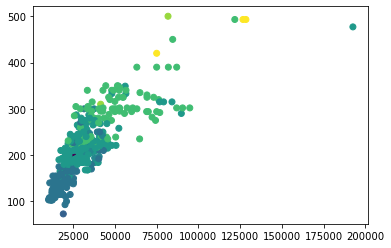

In [122]:
plt.scatter(cars['Price'], y=cars['horsepower'], c=cars['cylenders'])

<AxesSubplot:xlabel='Price', ylabel='horsepower'>

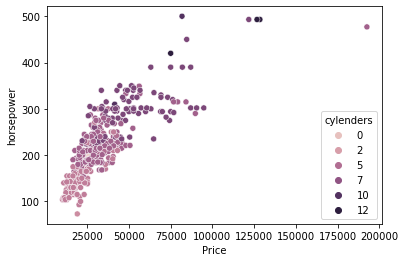

In [120]:
sns.scatterplot(x= 'Price',y='horsepower',data=cars, hue='cylenders')

# 6.Make a distribution plot of sepal length in iris and segregate it by power

/Users/dang/opt/anaconda3/envs/datascience_supplychain/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'sepal_length')

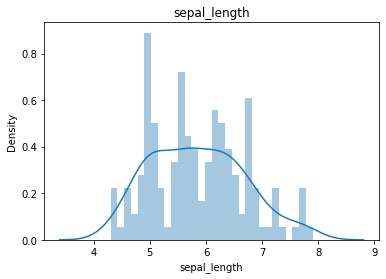

In [126]:
sns.distplot(iris.sepal_length, bins=30).set_title("sepal_length")

Text(0.5, 1.0, 'sepal_length')

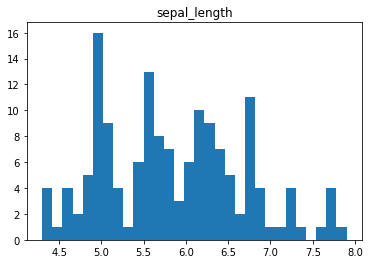

In [127]:
plt.hist(iris.sepal_length, bins=30)
plt.title('sepal_length')

In [129]:
np.unique(iris.species)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [131]:
setosa_data = iris[iris['species'] =='setosa']

In [132]:
versicolor_data = iris[iris['species'] =='versicolor']

In [133]:
virginica_data = iris[iris['species'] =='virginica']

<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

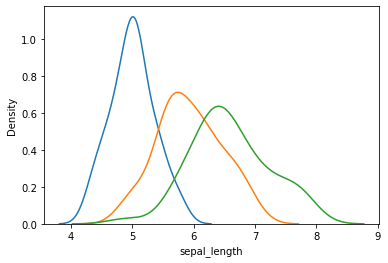

In [137]:
sns.kdeplot(setosa_data.sepal_length, label='setosa')
sns.kdeplot(versicolor_data.sepal_length, label='versicolor')
sns.kdeplot(virginica_data.sepal_length, label='virginica')

# 7.Make a boxplot for the number of cylenders of cars, make sre to take only 4,6,8 cylenders and horsepower

<AxesSubplot:xlabel='cylenders', ylabel='horsepower'>

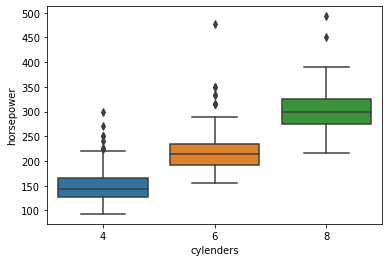

In [145]:
data_filter = cars.loc[cars['cylenders'].isin([4,6,8])]
sns.boxplot(x='cylenders', y='horsepower', data=data_filter)

# 8.make a pairplot of iris dataset segregated by flower type.


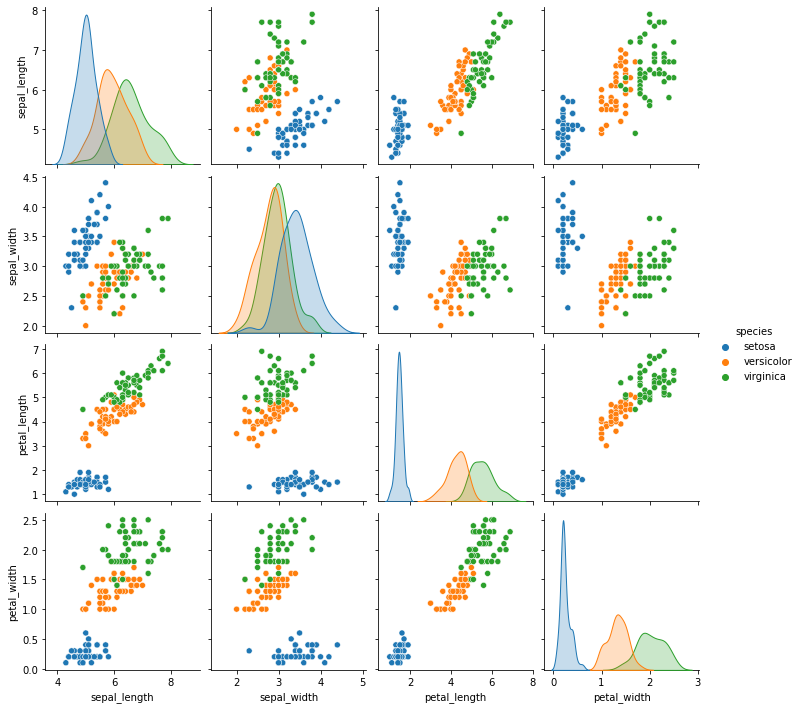

In [146]:

sns.pairplot(iris,hue='species')